In [1]:
from qiskit import *

In [2]:
from qiskit_aer import AerSimulator

In [3]:
from qiskit import transpile

In [4]:
circuit = QuantumCircuit(2,2)

In [5]:
quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2, 'cr')
circuit = QuantumCircuit(quantum_register, classical_register)

In [6]:
circuit.draw()

q1_0: 
      
q1_1: 
      
cr: 2/

In [7]:
%matplotlib inline

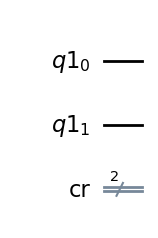

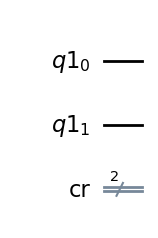

In [8]:
circuit.draw(output='mpl')

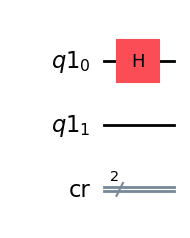

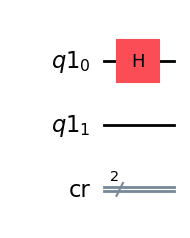

In [9]:
circuit.h(0)
circuit.draw(output='mpl')

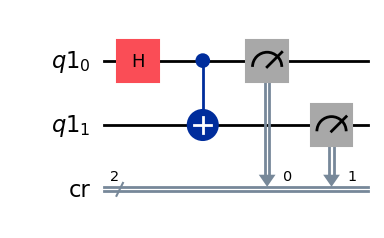

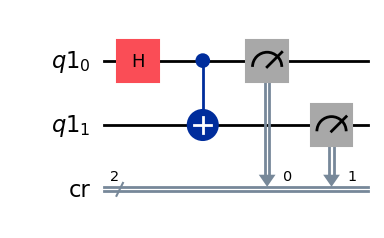

In [10]:
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [11]:
simulator=AerSimulator()

In [16]:
transpiled=transpile(circuit, basis_gates=simulator)

In [18]:
# Ejecutar el circuito en el simulador
result = simulator.run(transpiled).result()

In [19]:
from qiskit.visualization import plot_histogram

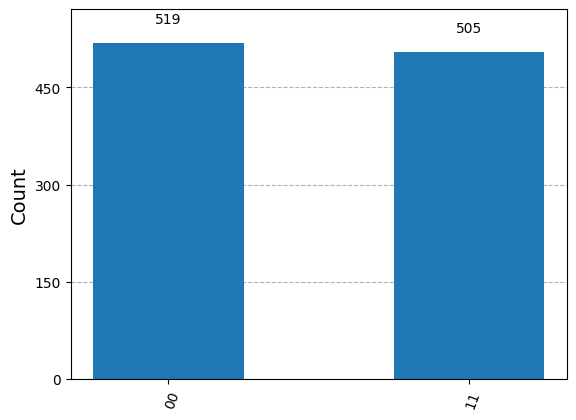

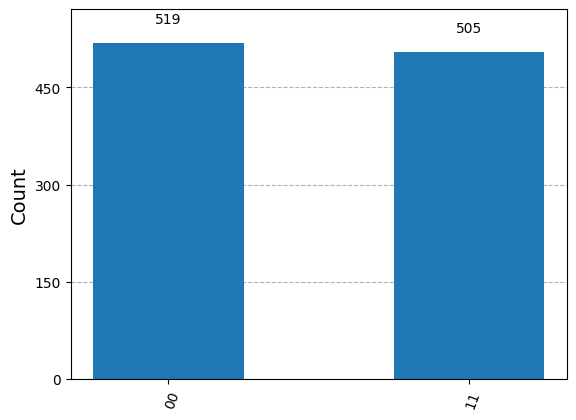

In [20]:
plot_histogram(result.get_counts(circuit))

In [11]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

In [12]:
service = QiskitRuntimeService(channel="ibm_quantum")

In [13]:
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=10)

In [14]:
# Obtener el "target" del backend
target = backend.target

# Transpilar sin pasar el backend directamente
isa_circuit = transpile(circuit, target=target, optimization_level=1)

# Ejecutar usando Sampler
sampler = Sampler(backend)
job = sampler.run([isa_circuit])
result = job.result()


In [17]:
print(f" > Counts: {result[0].data}")


 > Counts: DataBin(cr=BitArray(<shape=(), num_shots=4096, num_bits=2>))


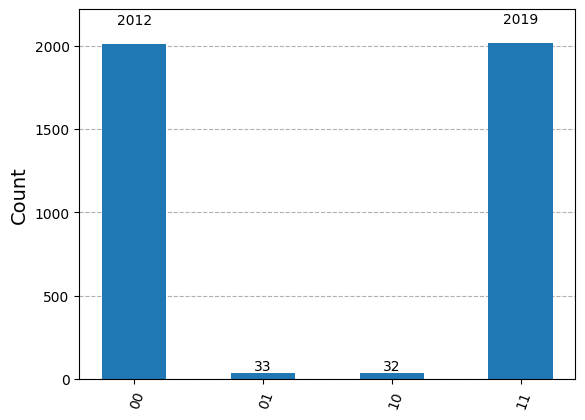

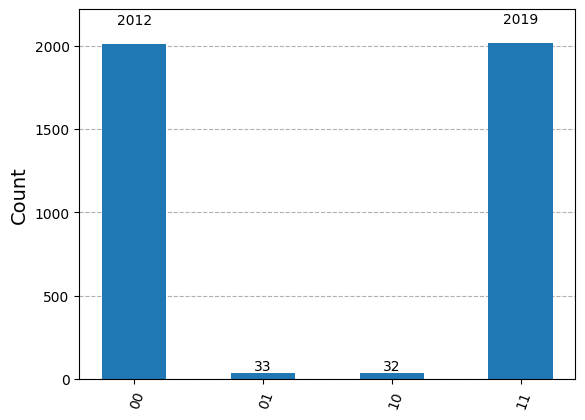

In [24]:
plot_histogram(result[0].data.cr.get_counts())